In [13]:
# Load the Au nanoparticle dataset
# Make sure to upload the CSV file to your Colab environment first
import pandas as pd
df = pd.read_csv('/content/Au_nanoparticle_dataset.csv')

# Create new dataframe with only specified columns
selected_columns = ['N_total', 'N_bulk', 'N_surface', 'R_avg']
new_df = df[selected_columns].copy()

print("Original dataset shape:", df.shape)
print("Filtered dataset shape:", new_df.shape)
print("\nColumn names in filtered dataset:", new_df.columns.tolist())

Original dataset shape: (4000, 185)
Filtered dataset shape: (4000, 4)

Column names in filtered dataset: ['N_total', 'N_bulk', 'N_surface', 'R_avg']


In [14]:
# Display first 20 samples
print("First 20 samples of the filtered dataset:")
print(new_df.head(20))

First 20 samples of the filtered dataset:
    N_total  N_bulk  N_surface    R_avg
0      1599    1014        585  17.3706
1      1642    1034        608  17.6061
2      4637    3365       1272  25.3692
3      7189    5292       1897  29.7011
4     11004    8508       2496  34.2831
5     13375   10768       2607  36.6334
6     13795   11155       2640  37.0108
7     13947   11304       2643  37.1672
8     14020   11357       2663  37.2103
9     14056   11389       2667  37.2467
10     1534     966        568  17.1107
11     1559     974        585  17.2101
12     4356    3099       1257  24.8253
13     6550    4675       1875  29.0376
14    10175    7748       2427  33.4399
15    12393    9842       2551  35.6950
16    13207   10590       2617  36.4657
17    13543   10937       2606  36.7871
18    13713   11079       2634  36.9333
19    13791   11151       2640  37.0104


In [15]:
# Calculate mean, standard deviation, and quartiles
print("Statistical Summary:")
print("="*50)

for column in new_df.columns:
    print(f"\n{column}:")
    print(f"  Mean: {new_df[column].mean():.4f}")
    print(f"  Std Dev: {new_df[column].std():.4f}")
    print(f"  Q1 (25%): {new_df[column].quantile(0.25):.4f}")
    print(f"  Q2 (50%): {new_df[column].quantile(0.50):.4f}")
    print(f"  Q3 (75%): {new_df[column].quantile(0.75):.4f}")

# Alternative: Use describe() for comprehensive statistics
print("\nComprehensive Statistical Summary:")
print(new_df.describe())

Statistical Summary:

N_total:
  Mean: 3476.7865
  Std Dev: 3679.2868
  Q1 (25%): 1061.0000
  Q2 (50%): 1867.0000
  Q3 (75%): 4503.0000

N_bulk:
  Mean: 2521.5502
  Std Dev: 2976.2325
  Q1 (25%): 618.7500
  Q2 (50%): 1199.0000
  Q3 (75%): 3183.0000

N_surface:
  Mean: 955.2363
  Std Dev: 721.8702
  Q1 (25%): 437.0000
  Q2 (50%): 666.0000
  Q3 (75%): 1301.7500

R_avg:
  Mean: 20.6544
  Std Dev: 7.6107
  Q1 (25%): 15.1607
  Q2 (50%): 18.6292
  Q3 (75%): 25.5251

Comprehensive Statistical Summary:
            N_total        N_bulk   N_surface        R_avg
count   4000.000000   4000.000000  4000.00000  4000.000000
mean    3476.786500   2521.550250   955.23625    20.654363
std     3679.286769   2976.232459   721.87022     7.610716
min      236.000000     89.000000   137.00000     8.528600
25%     1061.000000    618.750000   437.00000    15.160725
50%     1867.000000   1199.000000   666.00000    18.629250
75%     4503.000000   3183.000000  1301.75000    25.525125
max    14277.000000  11580.0

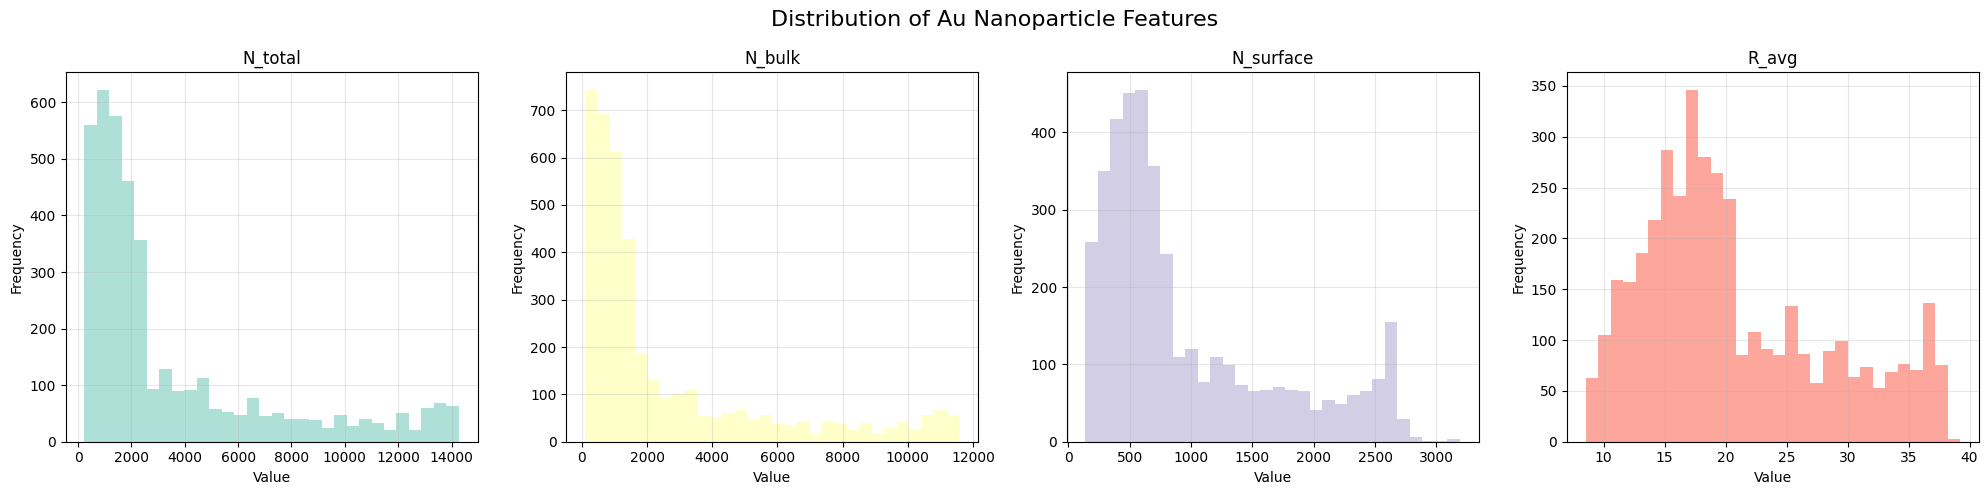

In [16]:
# Create histograms for each feature in 1x4 layout
fig, axes = plt.subplots(1, 4, figsize=(20, 5))
fig.suptitle('Distribution of Au Nanoparticle Features', fontsize=16)

for i, column in enumerate(new_df.columns):
    axes[i].hist(new_df[column], bins=30, alpha=0.7, color=plt.cm.Set3(i))
    axes[i].set_title(f'{column}')
    axes[i].set_xlabel('Value')
    axes[i].set_ylabel('Frequency')
    axes[i].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

<Figure size 1200x1000 with 0 Axes>

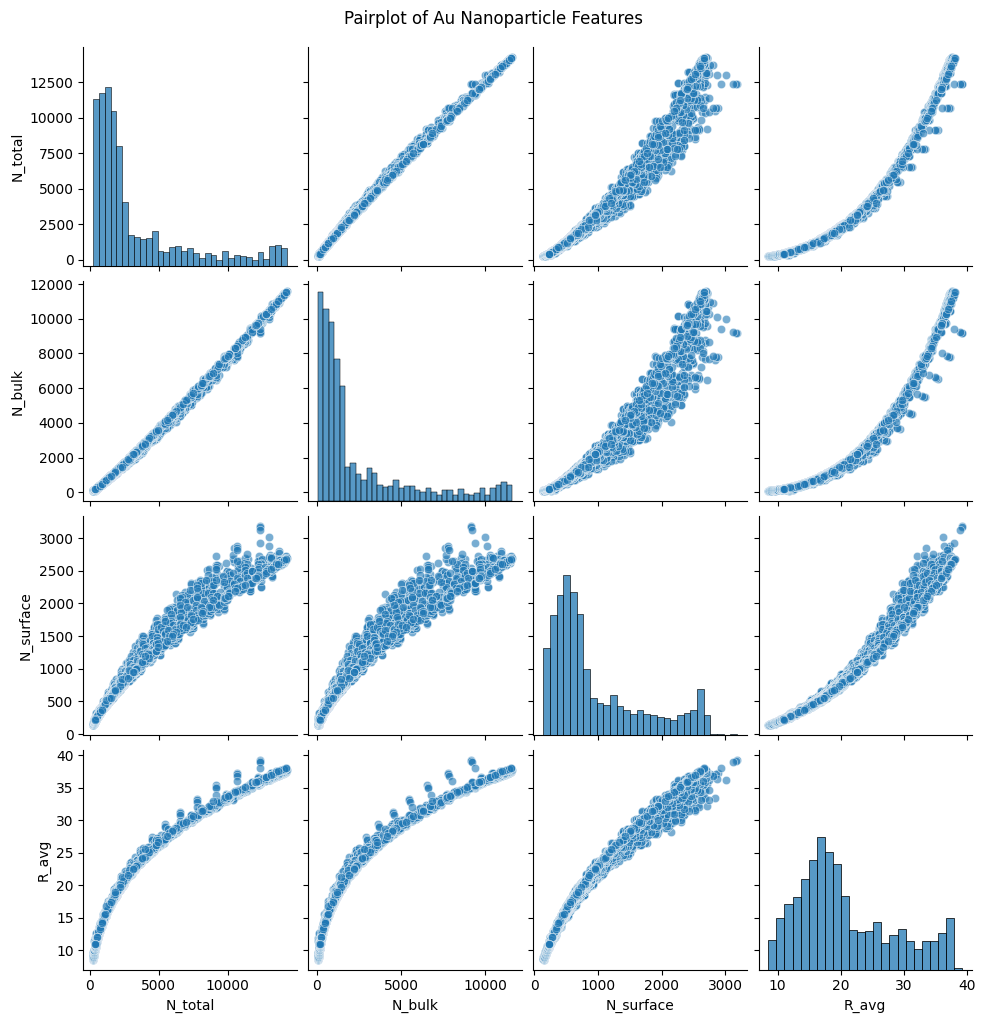

In [17]:
# Create pairplot using seaborn
plt.figure(figsize=(12, 10))
pair_plot = sns.pairplot(new_df, diag_kind='hist', plot_kws={'alpha': 0.6})
pair_plot.fig.suptitle('Pairplot of Au Nanoparticle Features', y=1.02)
plt.show()

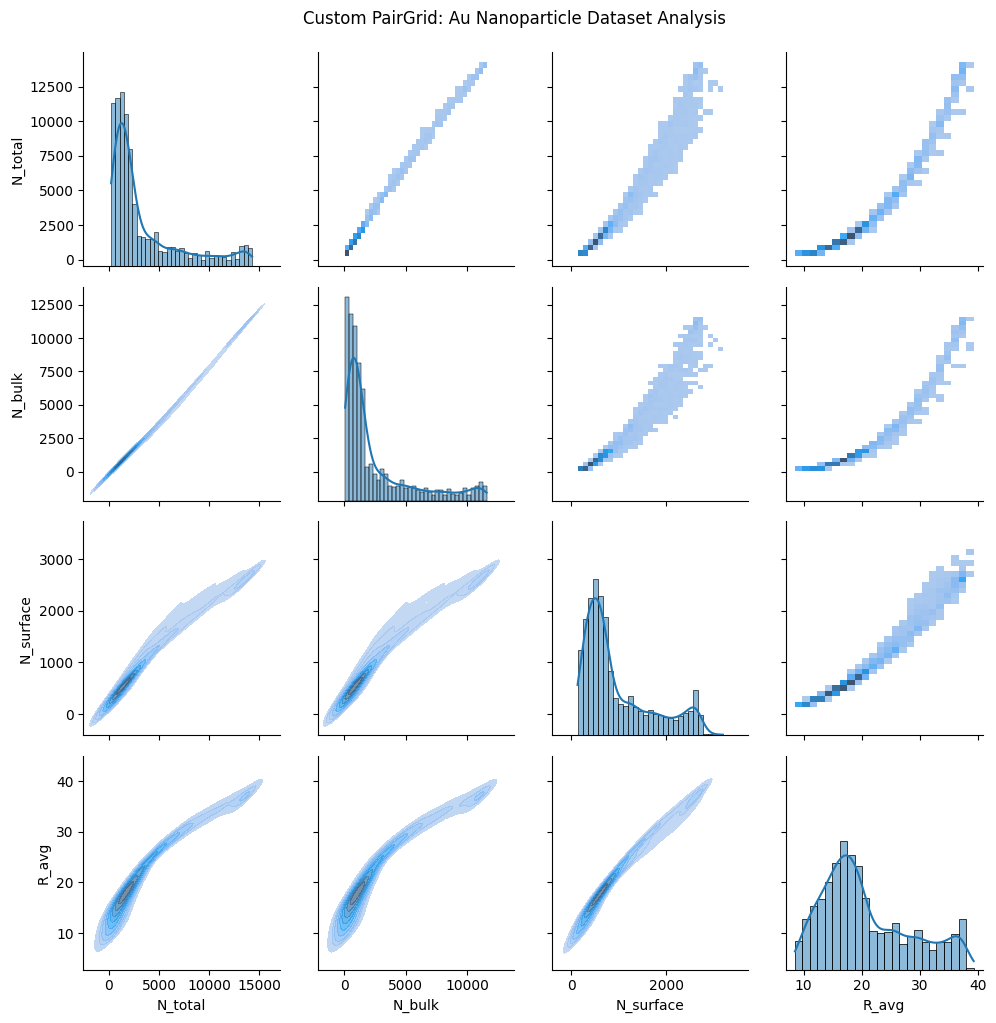

In [18]:
# Create custom PairGrid as specified
g = sns.PairGrid(new_df, height=2.5)

# Upper triangle: bivariate histograms
g.map_upper(sns.histplot)

# Diagonal: histograms with kernel density estimation
g.map_diag(sns.histplot, kde=True)

# Lower triangle: bivariate kernel density estimation
g.map_lower(sns.kdeplot, fill=True, alpha=0.7)

# Add title
g.fig.suptitle('Custom PairGrid: Au Nanoparticle Dataset Analysis', y=1.02)

plt.show()